### Development - 1.0

In [33]:
import os
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski

def calculate_mse(image1, image2):
    return np.mean((image1 - image2) ** 2)

def imnormalization(image: np.array) -> np.ndarray:
    image = image.astype(np.float32)
    for i in range(3):
        image[:, :, i] = image[:, :, i] / image[:, :, i].max()
    return image

def imsvd(image: np.array) -> list:
    chanel_svd = []
    for i in range(3):
        U, S, Vh = np.linalg.svd(image[:,:,i], full_matrices=False)
        dict_image = {'U': U, 'S': S, 'Vh': Vh}
        chanel_svd.append(dict_image)
    return chanel_svd

def imreconstruction(chanel_svd: list, rank: int) -> np.ndarray:
    image = []
    for i in range(3):
        U, S, Vh = chanel_svd[i].values()
        image.append(np.dot(U[:, :rank], np.dot(np.diag(S[:rank]), Vh[:rank, :])))

    image = np.stack(image, axis=-1)
    return np.clip(image, 0, 1)

In [42]:
if __name__ == '__main__':

    print(f"Start...")

    image_url = os.path.join('images', 'natureza.png')
    image_original = ski.io.imread(image_url)

    image = imnormalization(image_original) # Normalizar imagem
    
    chanel_svd = imsvd(image) # Computar SVD da imagem
    
    print(f"Done!")

Start...
Done!


### Comprimir a imagem

Escolha um valor para o rank (k) da decomposição

In [43]:
k = 200 # Rank da decomposição
compressed_image = imreconstruction(chanel_svd, k)

### Comparar imagens

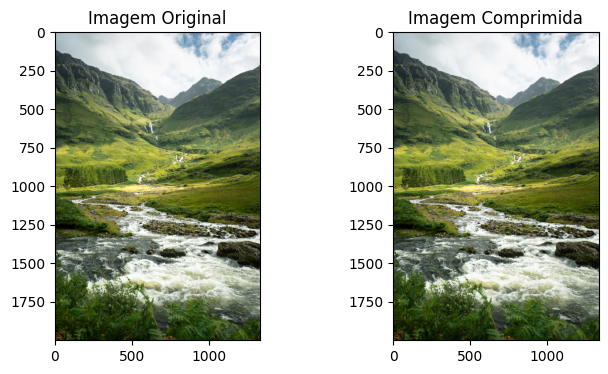

In [44]:
# Visualizar
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Imagem Original")
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.title("Imagem Comprimida")
plt.imshow(compressed_image)
plt.show()

### Impacto do rank

Text(0, 0.5, 'MSE')

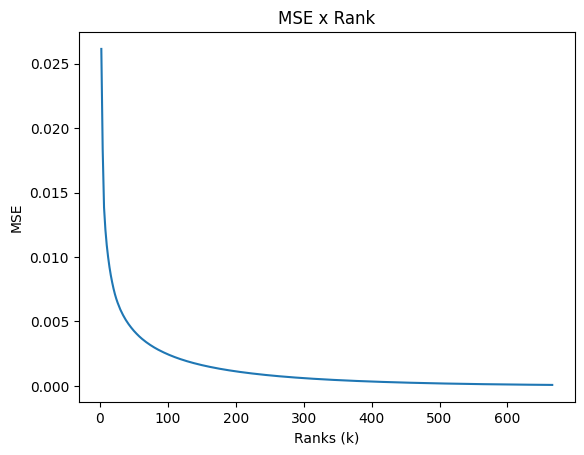

In [45]:
star, stop, step = 2, int(min(image[:,:,0].shape) / 2), 2
metrics = []
for k in range(star, stop, step):
    compressed_image = imreconstruction(chanel_svd, k)
    metrics.append(calculate_mse(image, compressed_image))

plt.plot(range(star, stop, step), metrics)
plt.title('MSE x Rank')
plt.xlabel('Ranks (k)')
plt.ylabel('MSE')

### Salvar a imagem

In [ ]:
# Retornar imagem para [0, 255]
compressed_image = (compressed_image * 255).astype(np.uint8)

In [65]:
# Salvar a imagem
ski.io.imsave('image_original_compressed.jpeg', image_original)